In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train=pd.read_csv("D:/Downloads/trainset.csv")

In [3]:
df_test=pd.read_csv("D:/Downloads/testset.csv")

In [4]:
trainset=df_train.iloc[:,1:2].values
trainset

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_scaled=sc.fit_transform(trainset)
training_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [6]:
x_train=[]
y_train=[]

for i in range(60,1259):
    x_train.append(training_scaled[i-60:i,0])
    y_train.append(training_scaled[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)
x_train.shape

(1199, 60)

In [7]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [9]:
regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [10]:
regressor.compile(optimizer='Adam',loss='mse')

In [11]:
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 20s 178ms/step - loss: 0.0376
Epoch 2/100
38/38 [==============================] - 7s 183ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 7s 179ms/step - loss: 0.0040
Epoch 4/100
38/38 [==============================] - 7s 183ms/step - loss: 0.0035
Epoch 5/100
38/38 [==============================] - 7s 180ms/step - loss: 0.0036
Epoch 6/100
38/38 [==============================] - 7s 177ms/step - loss: 0.0031
Epoch 7/100
38/38 [==============================] - 7s 182ms/step - loss: 0.0036
Epoch 8/100
38/38 [==============================] - 7s 175ms/step - loss: 0.0037
Epoch 9/100
38/38 [==============================] - 7s 183ms/step - loss: 0.0041
Epoch 10/100
38/38 [==============================] - 7s 187ms/step - loss: 0.0029
Epoch 11/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0032
Epoch 12/100
38/38 [==============================] - 7s 184ms/step - loss: 0.0028
Epoch 13/100

In [12]:
real_stock_price=df_test.iloc[:,1:2].values

In [13]:
dataset_total=pd.concat((df_train['Open'],df_test['Open']),axis=0)
dataset_total

0       357.385559
1       360.122742
2       362.313507
3       365.348755
4       365.393463
          ...     
120    1143.599976
121    1128.000000
122    1121.339966
123    1102.089966
124    1120.000000
Name: Open, Length: 1384, dtype: float64

In [14]:
inputs=dataset_total[len(dataset_total)-len(df_test)-60:].values
inputs

array([ 955.48999 ,  966.700012,  980.      ,  980.      ,  973.719971,
        987.450012,  992.      ,  992.099976,  990.289978,  991.77002 ,
        986.      ,  989.440002,  989.52002 ,  970.      ,  968.369995,
        980.      , 1009.190002, 1014.      , 1015.219971, 1017.210022,
       1021.76001 , 1022.109985, 1028.98999 , 1027.27002 , 1030.52002 ,
       1033.98999 , 1026.459961, 1023.419983, 1022.590027, 1019.210022,
       1022.52002 , 1034.01001 , 1020.26001 , 1023.309998, 1035.      ,
       1035.869995, 1040.      , 1055.089966, 1042.680054, 1022.369995,
       1015.799988, 1012.659973,  995.940002, 1001.5     , 1020.429993,
       1037.48999 , 1035.5     , 1039.630005, 1046.119995, 1045.      ,
       1054.609985, 1066.079956, 1075.199951, 1071.780029, 1064.949951,
       1061.109985, 1058.069946, 1057.390015, 1051.599976, 1046.719971,
       1048.339966, 1064.310059, 1088.      , 1094.      , 1102.22998 ,
       1109.400024, 1097.099976, 1106.300049, 1102.410034, 1132.

In [15]:
inputs=inputs.reshape(-1,1)
inputs

array([[ 955.48999 ],
       [ 966.700012],
       [ 980.      ],
       [ 980.      ],
       [ 973.719971],
       [ 987.450012],
       [ 992.      ],
       [ 992.099976],
       [ 990.289978],
       [ 991.77002 ],
       [ 986.      ],
       [ 989.440002],
       [ 989.52002 ],
       [ 970.      ],
       [ 968.369995],
       [ 980.      ],
       [1009.190002],
       [1014.      ],
       [1015.219971],
       [1017.210022],
       [1021.76001 ],
       [1022.109985],
       [1028.98999 ],
       [1027.27002 ],
       [1030.52002 ],
       [1033.98999 ],
       [1026.459961],
       [1023.419983],
       [1022.590027],
       [1019.210022],
       [1022.52002 ],
       [1034.01001 ],
       [1020.26001 ],
       [1023.309998],
       [1035.      ],
       [1035.869995],
       [1040.      ],
       [1055.089966],
       [1042.680054],
       [1022.369995],
       [1015.799988],
       [1012.659973],
       [ 995.940002],
       [1001.5     ],
       [1020.429993],
       [10

In [16]:
inputs=sc.transform(inputs)
inputs.shape

(185, 1)

In [17]:
x_test=[]
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])


In [18]:
x_test=np.array(x_test)
x_test.shape

(125, 60)

In [19]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [20]:
predicted_price=regressor.predict(x_test)

4/4 [==============================] - 3s 58ms/step


In [21]:

predicted_price=sc.inverse_transform(predicted_price)
predicted_price

array([[1030.8899 ],
       [1029.4629 ],
       [1031.9833 ],
       [1040.5228 ],
       [1050.6703 ],
       [1059.632  ],
       [1066.6759 ],
       [1068.6292 ],
       [1069.5553 ],
       [1069.7456 ],
       [1075.6813 ],
       [1082.1268 ],
       [1087.6678 ],
       [1091.487  ],
       [1094.8381 ],
       [1101.7509 ],
       [1112.1376 ],
       [1120.1592 ],
       [1125.1764 ],
       [1128.1261 ],
       [1128.2461 ],
       [1128.0879 ],
       [1126.9535 ],
       [1118.511  ],
       [1103.4948 ],
       [1078.6749 ],
       [1065.004  ],
       [1057.8796 ],
       [1047.7593 ],
       [1042.6499 ],
       [1041.2516 ],
       [1041.8119 ],
       [1047.8381 ],
       [1056.2968 ],
       [1062.9856 ],
       [1069.301  ],
       [1075.6068 ],
       [1079.5302 ],
       [1084.1733 ],
       [1090.9625 ],
       [1093.6783 ],
       [1090.8624 ],
       [1076.6554 ],
       [1065.0621 ],
       [1063.9341 ],
       [1066.9532 ],
       [1074.9117 ],
       [1086.

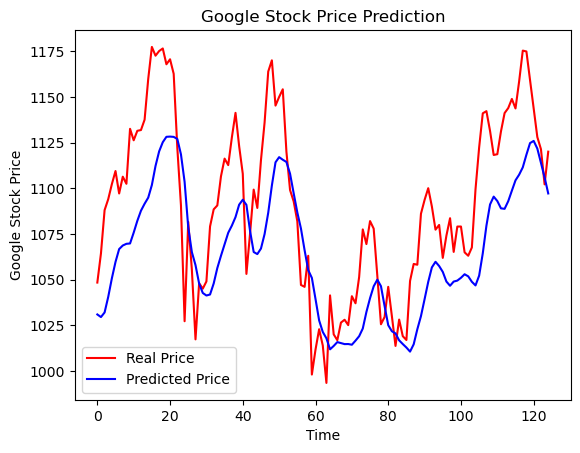

In [22]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()